In [1]:
import pandas as pd
import umap
from twilite.preprocessing import Matrix
from twilite.transformation import Decomposition
from twilite.model_tuning import Validation
from twilite.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('examples/data/data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
hashtag = Pipeline(
    preprocess=Matrix(filter_by='frequency', user_num=5, ft_freq=30, ft_num=2),
    transform=Decomposition(mapper=umap.UMAP(n_components=2)),
    evaluate=Validation(model=KMeans, eval_range=range(2,10), metric=silhouette_score)
)

In [4]:
hashtag.fit(df)

<AxesSubplot:xlabel='xcord', ylabel='ycord'>

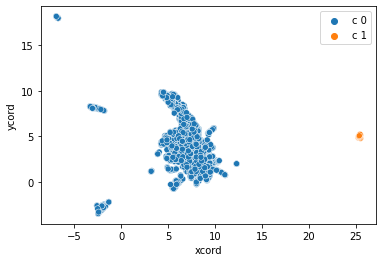

In [5]:
hashtag.scatter_plot()